In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
Base = automap_base()
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base.prepare(engine,reflect=True)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
# session_station = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('SELECT * FROM Measurement ORDER BY date DESC').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
engine.execute("SELECT Date FROM Measurement ORDER BY Date DESC").fetchone()
# Calculate the date one year from the last date in data set.

('2017-08-23',)

In [12]:
# Calculate the date one year from the last date in data set.
engine.execute("SELECT Date FROM Measurement WHERE Date > '2016-08-23'").fetchone()


('2016-08-24',)

In [13]:
# Perform a query to retrieve the data and precipitation scores
engine.execute("SELECT Date, prcp FROM Measurement WHERE Date > '2016-08-23'").fetchall()


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text major ticklabel objects>)

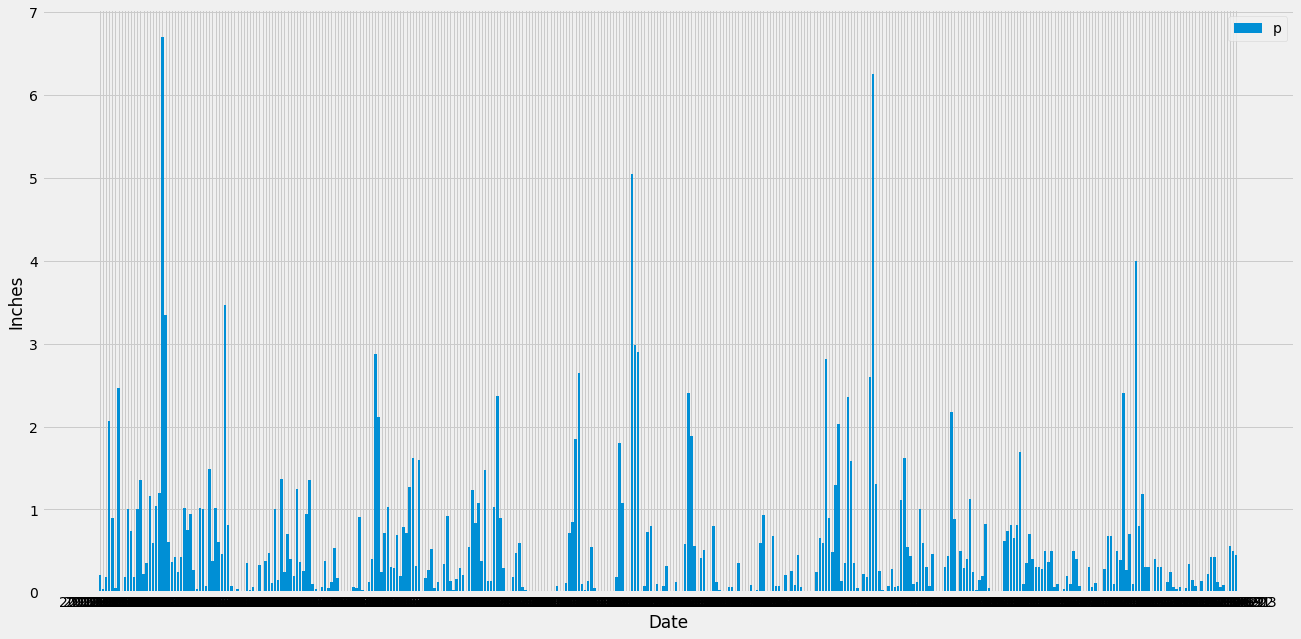

In [33]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > "2016-08-24", Measurement.prcp !=None).all()

# Sort the dataframe by date
mes_df = pd.DataFrame(results)
mes_df = mes_df.set_index('date').sort_index()
mes_df = mes_df.reset_index()
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,10))
plt.bar(mes_df['date'], mes_df['prcp'])
# plt.figure(figsize=[10, 10])
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend('precepitation')
plt.yticks()
# plt.show()
# mes_df


In [23]:
# TODO:  THIS
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.name).count()
print(f'There are {station_count} stations')

There are 9 stations


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
m_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

m_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# TODO: Fix Decimal places
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
m_station = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
# m_station[0][0]


print(f'Station {m_station[0][0]} highest temp is {m_station[0][1]}F and lowest temp is {m_station[0][2]}F with an average of {m_station[0][3]}F.')

Station USC00519281 highest temp is 85.0F and lowest temp is 54.0F with an average of 71.66378066378067F.


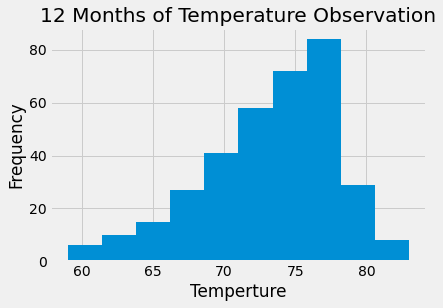

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
m_station_graph = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
    filter(Measurement.station == 'USC00519281', Measurement.date > "2016-08-24").order_by((Measurement.date).desc()).all()
m_station_graph
m_station_df = pd.DataFrame(m_station_graph)
# m_station_df = m_station_df.set_index('date').sort_index()
# m_station_df = m_station_df.reset_index()
plt.hist(m_station_df['tobs'])
plt.title('12 Months of Temperature Observation')
plt.xlabel('Temperture')
plt.ylabel('Frequency')
plt.show()
# m_station_df.to_csv('test')
# m_station_df

# Close session

In [20]:
# Close Session
session.close()